In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import skimage
from skimage import io
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

np.random.seed(42)

In [19]:
dataset_path = './asl_dataset'
class_names = [
  '0','1','2','3','4','5','6',
  '7','8','9','a','b','c','d',
  'e','f','g','h','i','j','k',
  'l','m','n','o','p','q','r',
  's','t','u','v','w','x','y',
  'z'
]
# Loading and preprocessing Image Data https://www.section.io/engineering-education/image-preprocessing-in-python/#:~:text=In%20this%20tutorial%2C%20we%20shall,used%20to%20preprocess%20image%20data.
dataPaths = []
for i in range(len(class_names)):
  path = os.path.join(dataset_path, class_names[i], '*')
  path = glob.glob(path)
  dataPaths.append(path)


# Merging Dataframes: https://www.stackvidhya.com/add-row-to-dataframe/
df = pd.DataFrame()
for i in range(len(dataPaths)):
  current_df = pd.DataFrame({"path": dataPaths[i], "category": class_names[i]})
  df = pd.concat([df, current_df], ignore_index=True, axis=0)
df.to_csv(f'./temp/categorized.csv')


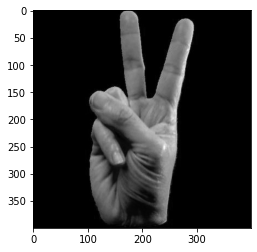

In [20]:
gray_image = skimage.color.rgb2gray(io.imread(df['path'][200]))
plt.imshow(gray_image, cmap = 'gray')


In [44]:

column_names = []
column_names.append("category")
[column_names.append("pixel"+str(x)) for x in range(0,160000)] # shape (785,0)
numberized_df = pd.DataFrame(columns=column_names)


# image = io.imread(dataPaths[0][0])
# gray_image = skimage.color.rgb2gray(image)
# numberized_image = gray_image.flatten()
# numberized_image = np.insert(numberized_image, 0, class_names[0])
# print(len(numberized_image))

for i in range(len(class_names)):
  for j in range(len(dataPaths[i])):
    image = io.imread(dataPaths[i][j])
    gray_image = skimage.color.rgb2gray(image)
    numberized_image = gray_image.flatten()
    numberized_image = np.insert(numberized_image, 0, class_names[i])
    numberized_image_df = pd.DataFrame(columns=column_names)
    numberized_image_df.loc[0] = numberized_image
    numberized_df = pd.concat([numberized_df,numberized_image_df], ignore_index=True)

numberized_df.to_csv(f'./temp/numberized.csv')

ValueError: could not convert string to float: 'a'